In [1]:
from pathlib import Path

import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
from scipy.cluster.hierarchy import cophenet
from scipy import stats
from sklearn.metrics import silhouette_score

from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.cm as cm

import dmba

%matplotlib inline

# Read Data

In [2]:
# utilities_df = dmba.load_data('Utilities.csv')
utilities_df = pd.read_csv('cluster-dataset-B.csv')

# while not required, the conversion of integer data to float will avoid a warning when 
# applying the scale function
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))
utilities_df.head()

,a1,a2
0,-0.957875,-0.381519
1,0.956159,-0.205555
2,0.346256,0.954574
3,-0.473346,0.335446
4,-0.066894,-0.901037


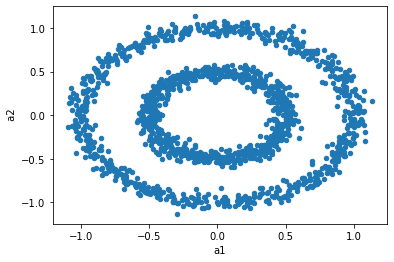

In [3]:
utilities_df.plot.scatter(x='a1', y=' a2')

In [4]:
# scikit-learn uses population standard deviation
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)

# Hirarchical Clustering 

## Single Linkage

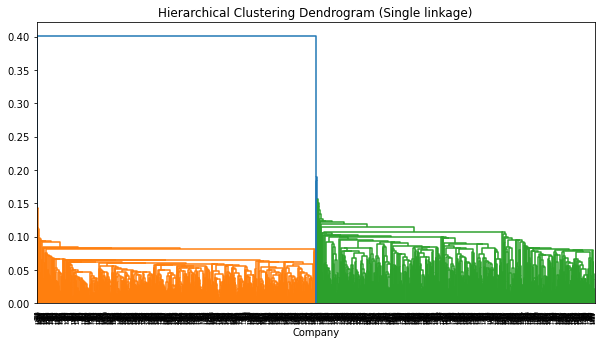

In [5]:
Z = linkage(utilities_df_norm, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Company')
dendrogram(Z, labels=utilities_df_norm.index, color_threshold=0.160)
plt.axhline(y=2.75, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [6]:
cophenet(Z)

array([0.10651676, 0.10651676, 0.40105006, ..., 0.09262348, 0.10651676,
       0.10651676])

In [7]:
from sklearn.cluster import AgglomerativeClustering

X = utilities_df_norm
Z = linkage(utilities_df_norm, method='single')

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single')
model = model.fit(X)

import numpy as np
sim_val = 100*(1 - model.distances_/np.max(model.distances_))
sim_val

import pandas as pd
res = pd.DataFrame(zip([X.shape[0]-i-1 for i in range(len(model.distances_))], model.distances_.round(3), sim_val.round(3), model.children_.tolist()), columns=['n_clusters','distance', 'similarity', 'points merged'], index=range(1, len(model.distances_)+1))
res['change_in_similarity_value'] = (res['similarity'] / res['similarity'].shift(1) *100).round(3)
res

,n_clusters,distance,similarity,points merged,change_in_similarity_value
1,1499,0.001,99.833,"[509, 1368]",NaN
2,1498,0.001,99.774,"[1316, 979]",99.941
3,1497,0.002,99.426,"[1213, 204]",99.651
4,1496,0.003,99.339,"[1099, 148]",99.912
5,1495,0.003,99.338,"[819, 211]",99.999
...,...,...,...,...,...
1495,5,0.156,61.069,"[2993, 2677]",97.684
1496,4,0.157,60.825,"[2994, 568]",99.600
1497,3,0.183,54.258,"[2995, 130]",89.203
1498,2,0.190,52.616,"[2996, 59]",96.974


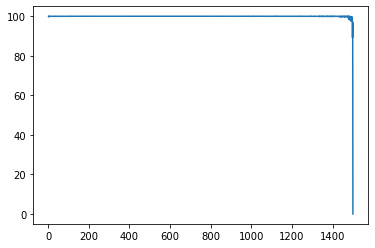

In [8]:
res.change_in_similarity_value.plot.line()

In [12]:
memb = fcluster(linkage(utilities_df_norm, 'single'), 2, criterion='maxclust')
memb

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [13]:
pd.Series(memb).value_counts()

2    750
1    750
dtype: int64

In [10]:
# memb = pd.Series(memb, index=utilities_df_norm.index)
# for key, item in memb.groupby(memb):
#     print(key, ': ', ', '.join(item.index))

In [14]:
idx_to_color = {1: 'red', 2: 'blue'}

color = [idx_to_color[m] for m in memb]

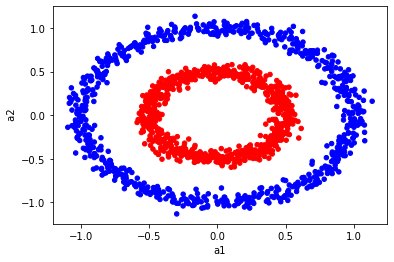

In [15]:
utilities_df.plot.scatter(x='a1', y=' a2', c=color)

## Average Linkage

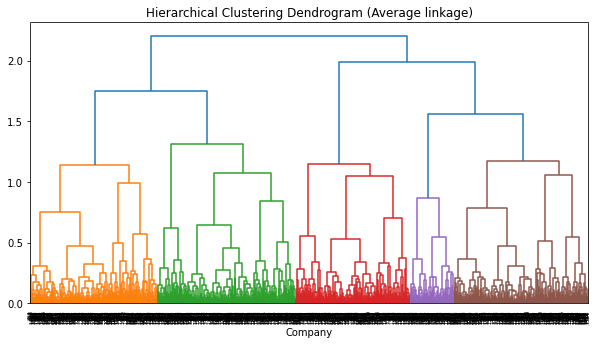

In [16]:
Z = linkage(utilities_df_norm, method='average')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Average linkage)')
plt.xlabel('Company')
dendrogram(Z, labels=utilities_df_norm.index, color_threshold=1.5)
plt.axhline(y=3.6, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering

X = utilities_df_norm
Z = linkage(utilities_df_norm, method='average')

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')
model = model.fit(X)

import numpy as np
sim_val = 100*(1 - model.distances_/np.max(model.distances_))
sim_val

import pandas as pd
res = pd.DataFrame(zip([X.shape[0]-i-1 for i in range(len(model.distances_))], model.distances_.round(3), sim_val.round(3), model.children_.tolist()), columns=['n_clusters','distance', 'similarity', 'points merged'], index=range(1, len(model.distances_)+1))
res['change_in_similarity_value'] = (res['similarity'] / res['similarity'].shift(1) *100).round(3)
res

,n_clusters,distance,similarity,points merged,change_in_similarity_value
1,1499,0.001,99.970,"[509, 1368]",NaN
2,1498,0.001,99.959,"[979, 1316]",99.989
3,1497,0.002,99.895,"[204, 1213]",99.936
4,1496,0.003,99.880,"[148, 1099]",99.985
5,1495,0.003,99.879,"[211, 819]",99.999
...,...,...,...,...,...
1495,5,1.311,40.483,"[2980, 2990]",86.691
1496,4,1.563,29.046,"[2986, 2993]",71.749
1497,3,1.745,20.769,"[2991, 2994]",71.504
1498,2,1.990,9.682,"[2992, 2995]",46.618


In [18]:
model.labels_.shape

(1500,)

In [19]:
98 - 81

17

In [ ]:
95 - 74

In [ ]:
81 - 74

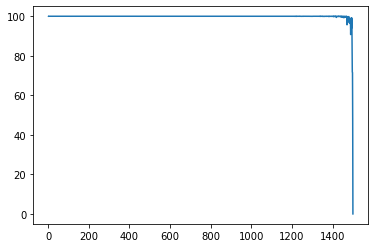

In [20]:
res.change_in_similarity_value.plot.line()

In [22]:
memb = fcluster(linkage(utilities_df_norm, 'average'), 2, criterion='maxclust')
memb

array([2, 1, 1, ..., 1, 1, 2], dtype=int32)

In [23]:
idx_to_color = {1: 'red', 2: 'blue', 3: 'yellow', 4: 'green'}

color = [idx_to_color[m] for m in memb]

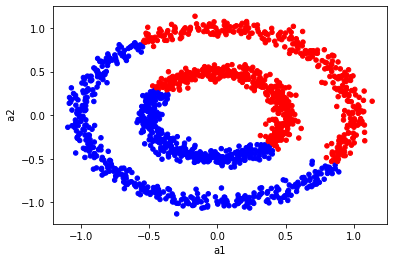

In [24]:
utilities_df.plot.scatter(x='a1', y=' a2', c=color)

# K-means Clustering

## Baseline

In [25]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(utilities_df_norm)

In [26]:
kmeans.labels_

array([2, 3, 1, ..., 3, 1, 2])

In [27]:
pd.Series(kmeans.labels_).value_counts()

3    267
5    256
0    252
2    248
4    239
1    238
dtype: int64

In [28]:
# # Cluster membership
# memb = pd.Series(kmeans.labels_, index=utilities_df_norm.index)
# for key, item in memb.groupby(memb):
#  print(key, ’: ’, ’, ’.join(item.index))

## Choosing K

In [29]:
inertia = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(utilities_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)

C:\Users\harshit.agarwal\my_Miniconda3\envs\python_env_v2\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  f"KMeans is known to have a memory leak on Windows "


In [30]:
inertia

[2999.9999999999964,
 953.257437634516,
 384.4037484676309,
 203.7888332595039,
 127.43759455212773,
 90.08139370412192,
 68.48546180531386,
 53.49508920732787,
 42.07667569751036]

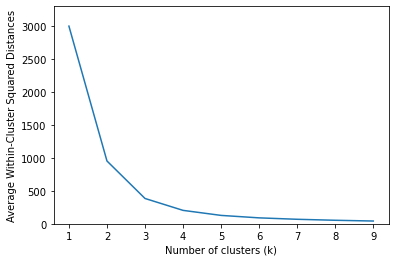

In [31]:
inertias = pd.DataFrame({'n_clusters': range(1, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

## Visualize

In [32]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(utilities_df_norm)



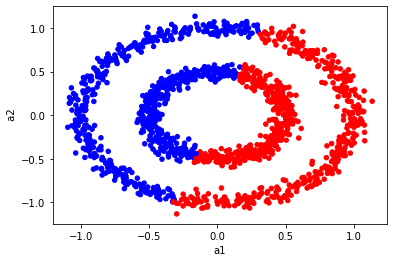

In [33]:
idx_to_color = {0: 'red', 1: 'blue'}

color = [idx_to_color[m] for m in kmeans.labels_]

utilities_df.plot.scatter(x='a1', y=' a2', c=color)

## Evaluation

# DBScan

## Baseline

In [34]:
from sklearn.cluster import DBSCAN
import numpy as np

X = utilities_df_norm.values

clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
pd.Series(clustering.labels_).value_counts()

0    1500
dtype: int64

In [36]:
clustering

DBSCAN(eps=3, min_samples=2)

## Choosing eps, min_samples

## Visualize

In [37]:
from sklearn.cluster import DBSCAN
import numpy as np

X = utilities_df_norm.values

clustering = DBSCAN(eps=0.2, min_samples=10).fit(X)
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
pd.Series(clustering.labels_).value_counts()

1    750
0    750
dtype: int64

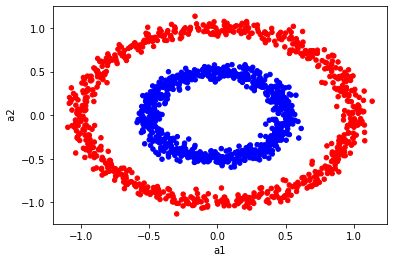

In [39]:
idx_to_color = {0: 'red', 1: 'blue'}

color = [idx_to_color[m] for m in clustering.labels_]

utilities_df.plot.scatter(x='a1', y=' a2', c=color)

In [40]:
silhouette_score(X, clustering.labels_)

0.11354128683008745

In [41]:
silhouette_vals = silhouette_samples(X, clustering.labels_)
silhouette_vals

array([-0.15594488, -0.17462279, -0.16189757, ..., -0.17854829,
       -0.15868563, -0.16294397])

In [42]:
df1 = utilities_df_norm
y_predict = clustering.labels_

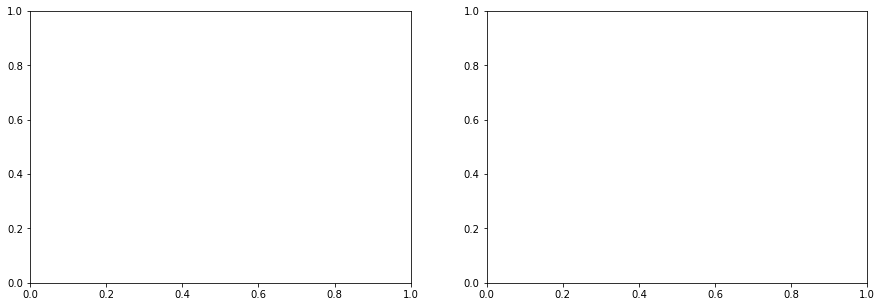

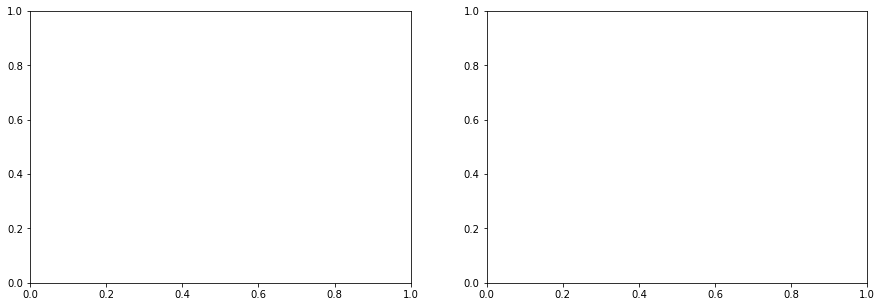

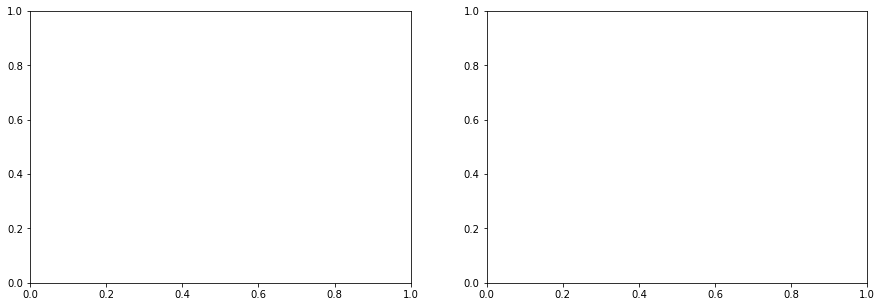

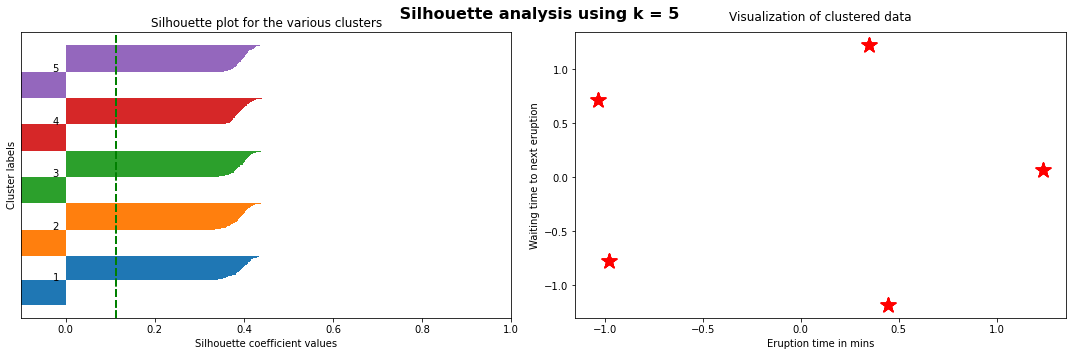

In [43]:
for i,k in enumerate([2,3,4,5]):
    
    fig, ax = plt.subplots(1,2,figsize=(15,5))
    
    # Run the kmeans algorithm
    km = KMeans(n_clusters=k)
    y_predict = km.fit_predict(utilities_df_norm)
    centroids  = km.cluster_centers_
# get silhouette
silhouette_vals = silhouette_samples(utilities_df_norm, clustering.labels_)

    #silhouette_vals
# silhouette plot
y_ticks = []
y_lower = y_upper = 0
for i,cluster in enumerate(np.unique(y_predict)):
    # import pdb; pdb.set_trace()
    cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)

    ax[0].barh(range(y_lower,y_upper),
    cluster_silhouette_vals,height =1);
    ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
    y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score 
    avg_score = np.mean(silhouette_vals)
    ax[0].axvline(avg_score,linestyle ='--',
    linewidth =2,color = 'green')
    ax[0].set_yticks([])
    ax[0].set_xlim([-0.1, 1])
    ax[0].set_xlabel('Silhouette coefficient values')
    ax[0].set_ylabel('Cluster labels')
    ax[0].set_title('Silhouette plot for the various clusters');


    # scatter plot of data colored with labels

    #ax[1].scatter(df2['petal length (cm)'],
    # df2['petal width (cm)'] , c = y_predict);
    ax[1].scatter(centroids[:,0],centroids[:,1], marker = '*' , c= 'r',s =250);
    ax[1].set_xlabel('Eruption time in mins')
    ax[1].set_ylabel('Waiting time to next eruption')
    ax[1].set_title('Visualization of clustered data', y=1.02)

    plt.tight_layout()
    plt.suptitle(f' Silhouette analysis using k = {k}',fontsize=16,fontweight = 'semibold')